In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import tensorflow as tf

# Task 1.1: Lossy Compression (JPEG)
image_path = "/content/Lena_Image.png"
image = cv2.imread(image_path)
cv2.imwrite("/content/Lena_compressed_lossy.jpg", image, [int(cv2.IMWRITE_JPEG_QUALITY), 50])

# Task 1.2: Lossless Compression (PNG)
cv2.imwrite("/content/Lena_compressed_losssless.png", image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])





True

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - accuracy: 0.9116 - loss: 0.2899 - val_accuracy: 0.9862 - val_loss: 0.0411
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 32ms/step - accuracy: 0.9865 - loss: 0.0426 - val_accuracy: 0.9902 - val_loss: 0.0309
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9919 - loss: 0.0267 - val_accuracy: 0.9894 - val_loss: 0.0333
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9914 - val_loss: 0.0273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9919 - val_loss: 0.0262
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 33ms/step - accuracy: 0.9964 - loss: 0.0106 - val_accuracy: 0.9903 - val_loss: 0.0327
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9974 - loss: 0.0077 - val_accuracy: 0.9906 - val_loss: 0.0333
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 35ms/step - accuracy: 0.9978 -

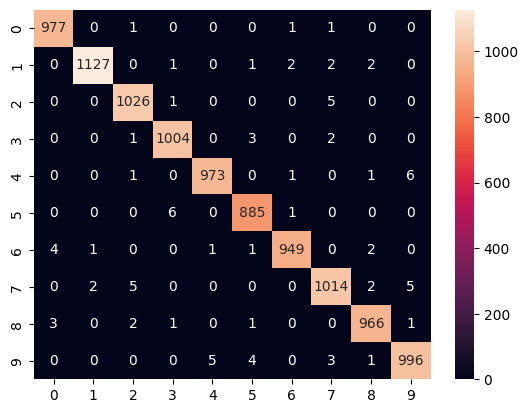

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


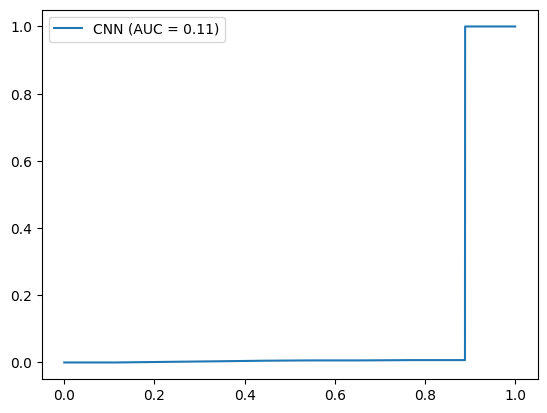

In [3]:
def train_mnist():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test).argmax(axis=1)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, model.predict(x_test).argmax(axis=1), pos_label=1)
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f})'.format(auc(fpr, tpr)))
    plt.legend()
    plt.show()

train_mnist()